In [19]:
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sb

In [2]:
data = pd.read_csv("Data/train.csv")
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [14]:
data['Y'].value_counts()

37.775421    26354
37.764221     4449
37.756486     3891
37.784189     3170
37.765050     3006
             ...  
37.767243        1
37.768625        1
37.765375        1
37.736992        1
37.738212        1
Name: Y, Length: 34243, dtype: int64

In [20]:
for col in data.columns:
    print(col, len(data[col].value_counts()), sep="\t\t")

# print(len(data['Category'].value_counts()))
# print(len(data['Address'].value_counts()))
# print(len(data['Descript'].value_counts()))
# print(len(data['X'].value_counts()))
# print(len(data['Y'].value_counts()))

Dates		389257
Category		39
Descript		879
DayOfWeek		7
PdDistrict		10
Resolution		17
Address		23228
X		34243
Y		34243


In [12]:
data.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

In [17]:
for col in data.columns:
    if data[col].dtypes == object:
        print(col, " - ", data[col].nunique(), "\n")
        if data[col].nunique() <= 40:
            print(data[col].unique())
        print("----------------------------------------------------------------------------")
        print("----------------------------------------------------------------------------\n")

Dates  -  389257 

----------------------------------------------------------------------------
----------------------------------------------------------------------------

Category  -  39 

['WARRANTS' 'OTHER OFFENSES' 'LARCENY/THEFT' 'VEHICLE THEFT' 'VANDALISM'
 'NON-CRIMINAL' 'ROBBERY' 'ASSAULT' 'WEAPON LAWS' 'BURGLARY'
 'SUSPICIOUS OCC' 'DRUNKENNESS' 'FORGERY/COUNTERFEITING' 'DRUG/NARCOTIC'
 'STOLEN PROPERTY' 'SECONDARY CODES' 'TRESPASS' 'MISSING PERSON' 'FRAUD'
 'KIDNAPPING' 'RUNAWAY' 'DRIVING UNDER THE INFLUENCE'
 'SEX OFFENSES FORCIBLE' 'PROSTITUTION' 'DISORDERLY CONDUCT' 'ARSON'
 'FAMILY OFFENSES' 'LIQUOR LAWS' 'BRIBERY' 'EMBEZZLEMENT' 'SUICIDE'
 'LOITERING' 'SEX OFFENSES NON FORCIBLE' 'EXTORTION' 'GAMBLING'
 'BAD CHECKS' 'TREA' 'RECOVERED VEHICLE' 'PORNOGRAPHY/OBSCENE MAT']
----------------------------------------------------------------------------
----------------------------------------------------------------------------

Descript  -  879 

-------------------------------

In [18]:
data.isna().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

Dates - timestamp of the crime incident<br>
DayOfWeek - the day of the week<br>
PdDistrict - name of the Police Department District<br>
Address - the approximate street address of the crime incident <br>
X - Longitude<br>
Y - Latitude<br>
<br><br><br>

Predict<br>
Category - category of the crime incident. This is the target variable you are going to predict.<br>
<br><br><br>

(only in train.csv)<br>
Descript - detailed description of the crime incident<br>
Resolution - how the crime incident was resolved<br>

[Folium](https://www.kaggle.com/code/shinichioto/folium-and-other-visualization-models-etc)

[Folium 2](https://www.kaggle.com/code/luckypen/san-francisco-crime-analysis/notebook)

In [3]:
data.shape

(878049, 9)

In [4]:
data.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [20]:
mp.style.context('fivethirtyeight')

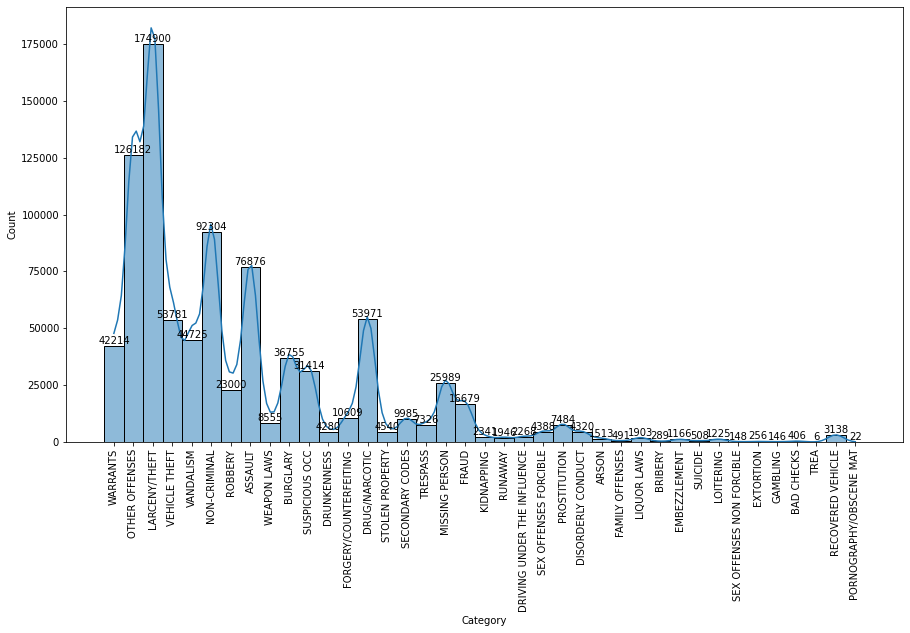

In [37]:
mp.figure(figsize = (15, 8))
plot = sb.histplot(x="Category", data = data, kde =True, palette = 'rocket')
_ = mp.xticks(rotation = 90)

for i in plot.containers:
    plot.bar_label(i,)

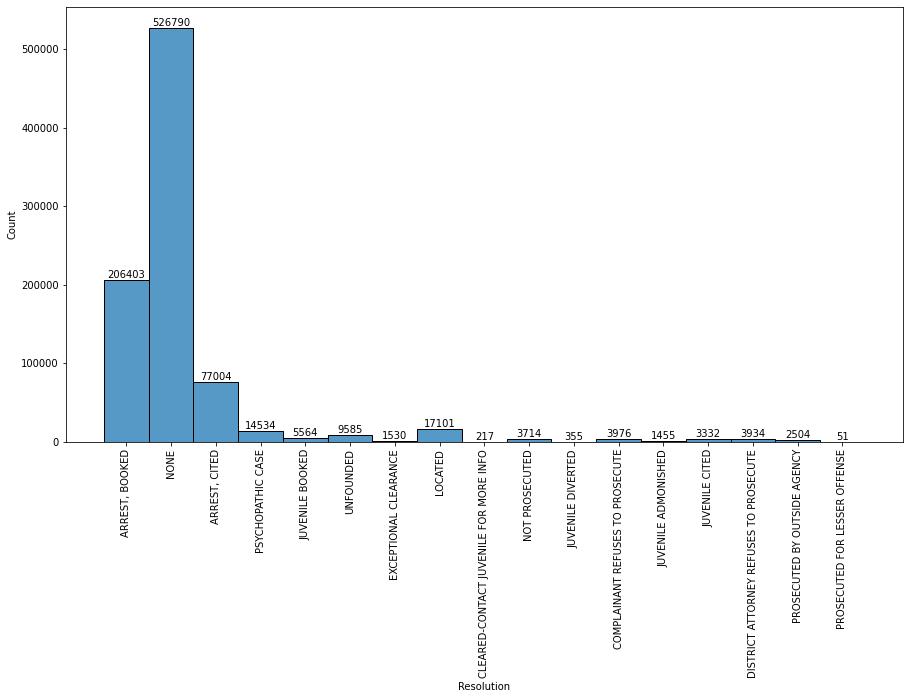

In [35]:
res_count = data["Resolution"].value_counts()

mp.figure(figsize = (15, 8))
plot = sb.histplot(x="Resolution", data = data, kde = False, palette = 'rocket')
_ = mp.xticks(rotation = 90)

for i in plot.containers:
    plot.bar_label(i,)